In [2]:
import bpy
import math

# Create a new mesh
mesh = bpy.data.meshes.new("Teardrop")

# Create the vertices
vertices = [(0, 0, 0)]

for i in range(16):
    x = math.cos(i * math.pi / 8)
    y = math.sin(i * math.pi / 8)
    z = 1 - x ** 2 - y ** 2
    vertices.append((x, y, z))

for i in range(16):
    x = math.cos(i * math.pi / 8)
    y = math.sin(i * math.pi / 8)
    z = -1 + x ** 2 + y ** 2
    vertices.append((x, y, z))

# Create the faces
faces = []
for i in range(16):
    faces.append((0, i + 1, (i + 1) % 16 + 1))
    faces.append((i + 1, i + 17, (i + 1) % 16 + 17))
    faces.append((i + 1, (i + 1) % 16 + 1, i + 17))
    faces.append((i + 17, (i + 1) % 16 + 17, (i + 1) % 16 + 1))

# Create the mesh and object
mesh.from_pydata(vertices, [], faces)
obj = bpy.data.objects.new("Teardrop", mesh)

# Add the object to the scene
scene = bpy.context.scene
scene.collection.objects.link(obj)

# Set up the camera
cam = bpy.data.objects["Camera"]
cam.location = (0, 0, 5)
cam.rotation_euler = (math.pi / 2, 0, 0)
cam.data.type = 'ORTHO'
cam.data.ortho_scale = 1.5

# Set up the render settings
render = bpy.context.scene.render
render.resolution_x = 512
render.resolution_y = 512
render.filepath = "//teardrop.png"
render.image_settings.file_format = 'PNG'

# Render the scene
bpy.ops.render.render(write_still=True)

Fra:1 Mem:15.23M (Peak 15.25M) | Time:00:00.00 | Syncing Cube
Fra:1 Mem:15.23M (Peak 15.29M) | Time:00:00.00 | Syncing Light
Fra:1 Mem:15.23M (Peak 15.29M) | Time:00:00.00 | Syncing Camera
Fra:1 Mem:15.24M (Peak 15.29M) | Time:00:00.00 | Syncing Teardrop
Fra:1 Mem:15.25M (Peak 15.29M) | Time:00:00.00 | Syncing Teardrop.001
Fra:1 Mem:15.25M (Peak 15.29M) | Time:00:00.00 | Rendering 1 / 64 samples
Fra:1 Mem:15.25M (Peak 15.29M) | Time:00:00.09 | Rendering 26 / 64 samples
Fra:1 Mem:15.25M (Peak 15.29M) | Time:00:00.12 | Rendering 51 / 64 samples
Fra:1 Mem:15.25M (Peak 15.29M) | Time:00:00.14 | Rendering 64 / 64 samples
Saved: 'teardrop.png'
 Time: 00:00.17 (Saving: 00:00.02)



{'FINISHED'}

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from renderstim.latents.dataset import latent_dataset
from renderstim.generators.render import render_scene
import matplotlib.pyplot as plt
import gc

In [24]:
latents = {
    "monkey": dict(
        num_scenes=2,
        resolution=[256, 256],
        min_num_objects=6,
        max_num_objects=6,
        spawn_region=[[-2.5, -3.0, 1.0], [2.5, 2.0, 2.5]],
        sun_position=[0.0, 0.0, 6.0],
        camera_position=[0.0, -6.1, 7.27],
        camera_look_at=[0.0, 0.0, 0.0],
        camera_focal_length=35.0,
        camera_sensor_width=32.0,
        floor_scale=[10.0, 10.0, 0.01],
        floor_position=[0.0, 0.0, 0.0],
        background_type="mixed"
    ),
    "mouse": dict(
        num_scenes=2,
        resolution=[2*256, 2*144],
        min_num_objects=5,
        max_num_objects=5,
        spawn_region=[[-2.5, -3.0, 1.0], [2.5, 1.0, 2.5]],
        sun_position=[0.0, 0.0, 6.0],
        camera_position=[0.0, -6.4, 7.67],
        camera_look_at=[0.0, 0.0, 0.0],
        camera_focal_length=35.0,
        camera_sensor_width=32.0,
        floor_scale=[8.0, 8.0, 0.1],
        floor_position=[0.0, 0.0, 0.0],
        background_type="realistic"
    )
}

In [25]:
scene_latents = latent_dataset(**latents["mouse"])
scenes = []

for i, sl in enumerate(scene_latents):
    frame, metadata = render_scene(sl)
    scenes.append(dict(frame=frame, metadata=metadata))
    gc.collect()

Fra:1 Mem:75.13M (Peak 107.13M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Synchronizing object | floor_781020841
Fra:1 Mem:75.13M (Peak 107.13M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Synchronizing object | obj4_781020841
Fra:1 Mem:83.10M (Peak 107.13M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Initializing
Fra:1 Mem:83.07M (Peak 107.13M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Updating Images | Loading obj4_781020841_material
Fra:1 Mem:83.32M (Peak 107.13M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Updating Images | Loading obj0_781020841_material
Fra:1 Mem:84.07M (Peak 107.13M) | Time:00:00.02 | Mem:0.00M, Peak:0.00M | Scene, View Layer | Updating Images | Loading obj3_781020841_material
Fra:1 Mem:69.70M (Peak 107.13M) | Time:00:00.02 | Mem:1.00M, Peak:1.00M | Scene, View Layer | Waiting for render to start
Fra:1 Mem:69.70M (Peak 107.13M) | Time:00:00.02 | Mem:1.00M, Peak:1.00M | 

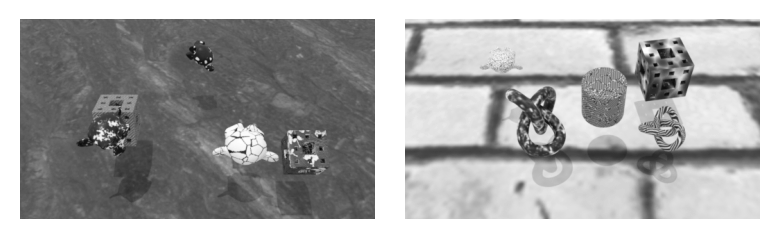

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), dpi=200)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(scenes[i]['frame']['grayscale'], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [21]:
cam_line = lambda x: (13/10) * (x - 11/2) + 13/2
cam_line(6.4)

7.670000000000001

In [ ]:
### Instance segmentation as per-pixel object-id with background=0. (h, w, 1) [uint8]
#### Note: because of this the instance IDs used here are one higher than their 
#### corresponding index in scene_latents["object_shapes"].
segmentation = scenes[0]['frame']['segmentation']
plt.imshow(segmentation)
plt.colorbar()
plt.axis("off")
plt.show()

In [ ]:
### Object Coordinates (h, w, 3) [uint8]
#### Object coordinates encode the position of each point relative to the objects 
#### bounding box (i.e. back-left-top (X=Y=Z=1) corner is white, while 
#### front-right-bottom (X=Y=Z=0) corner is black.)
object_coordinates = scenes[0]['frame']['object_coordinates']
plt.imshow(object_coordinates)
plt.axis("off")
plt.show()

In [ ]:
### "normal": (h, w, 3) [uint8]
#### Surface normals for each pixel in world coordinates.
normals = scenes[0]['frame']['normal']
plt.imshow(normals)
plt.axis("off")
plt.show()

In [ ]:
### "depth": (h, w, 1) [uint16]
#### Distance of each pixel from the center of the camera.
#### The values are stored as uint16 and span the range specified in metadata["depth_scaling"]. 
#### To convert them back to world-units use:
#### minv, maxv = metadata["depth_scaling"].values()
#### depth = frame["depth"] / 65535 * (maxv - minv) + minv
minv, maxv = scenes[0]['metadata']["depth_scaling"].values()
depth = scenes[0]['frame']["depth"] / 65535 * (maxv - minv) + minv

plt.imshow(depth)
plt.axis("off")
plt.colorbar()
plt.show()

In [ ]:
scenes[0]['metadata']